In [4]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 준비
# 상대경로로 CSV 읽어오기
file_path = '../../training_data.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())

   Unnamed: 0  leverage_ratio  asset_liabilities    roe  asset_turnover  \
0           1          14.933           1.067048  0.107           0.081   
1           2          14.734           1.067941  0.117           0.085   
2           3          15.294           1.065449  0.137           0.085   
3           4          13.652           1.072060  0.167           0.097   
4           5          13.390           1.071841  0.151           0.106   

   debt_ratio  debt_ratio2    roa  capitalization_ratio  longtermdebt_invcap  \
0       0.937        0.043  0.018                 0.244                0.244   
1       0.936        0.041  0.020                 0.230                0.230   
2       0.939        0.049  0.021                 0.317                0.317   
3       0.932        0.070  0.025                 0.272                0.298   
4       0.930        0.071  0.023                 0.244                0.264   

   totaldebt_invcap  cash_debt  debt_ebitda  rect_turn  label  
0   

In [8]:
# 컬럼명 안전하게 변환 (특수문자 제거)
df.columns = df.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)

# X, y 분리
X = df.drop('label', axis=1)
y = df['label']

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = lgb.LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 331, number of negative: 13973
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3292
[LightGBM] [Info] Number of data points in the train set: 14304, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.023140 -> initscore=-3.742764
[LightGBM] [Info] Start training from score -3.742764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

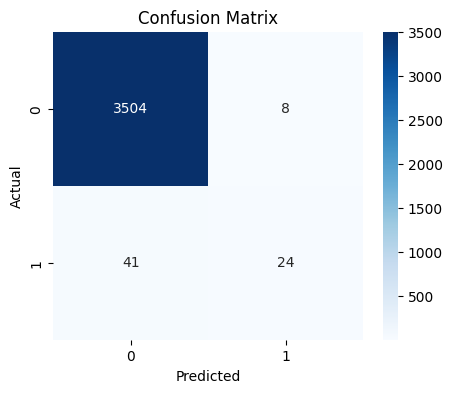

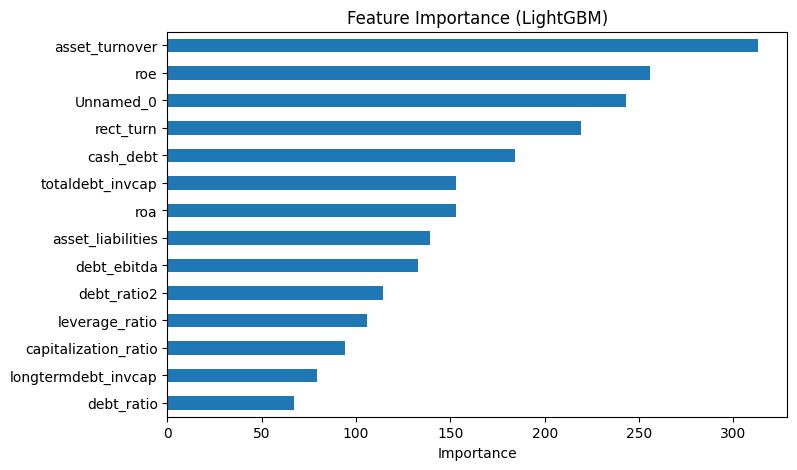

In [9]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance 시각화 (split 기준)
importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(8,5))
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.show()